<a href="https://colab.research.google.com/github/LucasSSales/Lista03-Visao-Computacional/blob/main/VC_Lista_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('pip install opencv-python==3.4.2.16'.split())
    subprocess.call('pip install opencv-contrib-python==3.4.2.16'.split())

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize

# QUESTÃO 01

In [43]:
#PEGANDO OS PARES DE IMAGENS

# PANORAMA 01
maki = cv.cvtColor(cv.imread('maki.jpg'), cv.COLOR_BGR2RGB)
maki_l = maki[0:, 0:1200]
maki_r = maki[100:1000, 800:]

# PANORAMA 02
decade = cv.cvtColor(cv.imread('decade.jpg'), cv.COLOR_BGR2RGB)
decade1, decade2 = decade[0:, 0:450], cv.rotate(decade[0:, 200:], cv.ROTATE_90_CLOCKWISE)

# PANORAMA 03
left1 = cv.cvtColor(cv.imread('left1.jpg'), cv.COLOR_BGR2RGB)
right1 = cv.cvtColor(cv.imread('right1.jpg'), cv.COLOR_BGR2RGB)

# PANORAMA 04
left2= cv.cvtColor(cv.imread('left2.jpg'), cv.COLOR_BGR2RGB)
right2 = cv.cvtColor(cv.imread('right2.jpg'), cv.COLOR_BGR2RGB)

# PANORAMA 05
left3= cv.cvtColor(cv.imread('left3.jpg'), cv.COLOR_BGR2RGB)
right3 = cv.cvtColor(cv.imread('right3.jpg'), cv.COLOR_BGR2RGB)

In [39]:
def detect_match_warp(img1, img2, percent=0.75):
  # usando sift para detecção de features e gerar os descritores
  sift = cv.xfeatures2d.SIFT_create()
  # imagem de base
  kp1, des1 = sift.detectAndCompute(img1,None)
  # imagem que será deformada
  kp2, des2 = sift.detectAndCompute(img2,None)
  # Usando Brute Force com KNN
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des2,des1,k=2)
  good = []
  for m,n in matches:
      if m.distance < percent*n.distance:
          good.append([m])
  match = cv.drawMatchesKnn(img2,kp2,img1,kp1,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  # realizando o warp da imagem
  src_pts = np.float32([ kp2[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp1[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
  M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC)
  #warp = cv.warpPerspective(img2, M, (img1.shape[1]+img2.shape[1], img1.shape[0]+img2.shape[0]))
  warp = cv.warpPerspective(img2, M, (img1.shape[1]+img2.shape[1], img1.shape[0]))
  #plots
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(match),plt.show()
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  plt.imshow(warp),plt.show()
  # retornando o warp e os pontos bons
  return match, warp

def plot_question_imgs(img1, img2):
  plt.subplot(121),plt.imshow(img1),plt.title('Base')
  plt.xticks([]), plt.yticks([])

  plt.subplot(122),plt.imshow(img2),plt.title('A ser deformada')
  plt.xticks([]), plt.yticks([])

  plt.show()


### PANORAMA 01

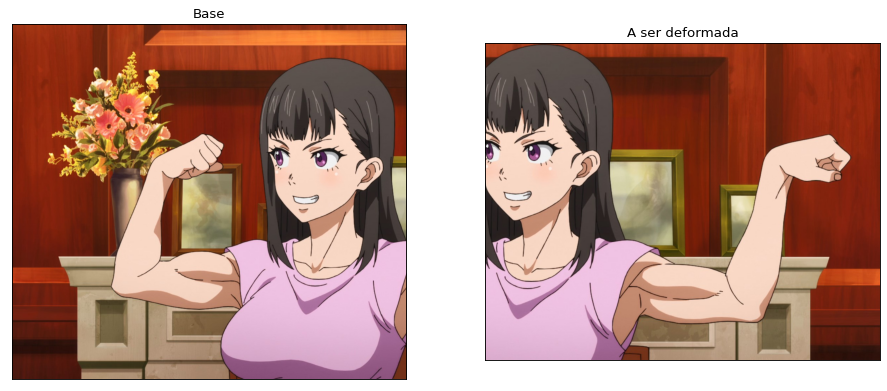

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(maki_l, maki_r)

<Figure size 800x800 with 0 Axes>

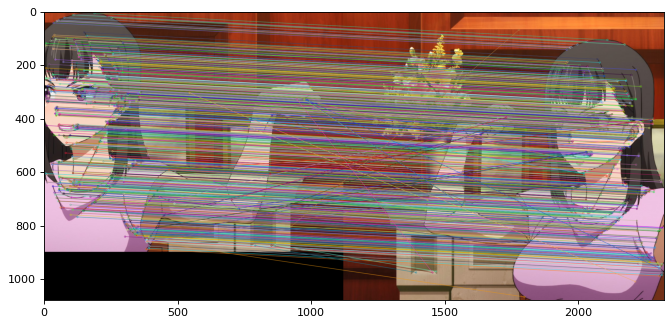

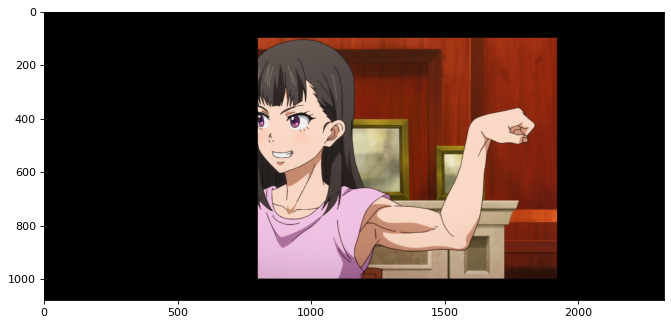

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match_maki, warp_maki = detect_match_warp(maki_l, maki_r)

### PANORAMA 02

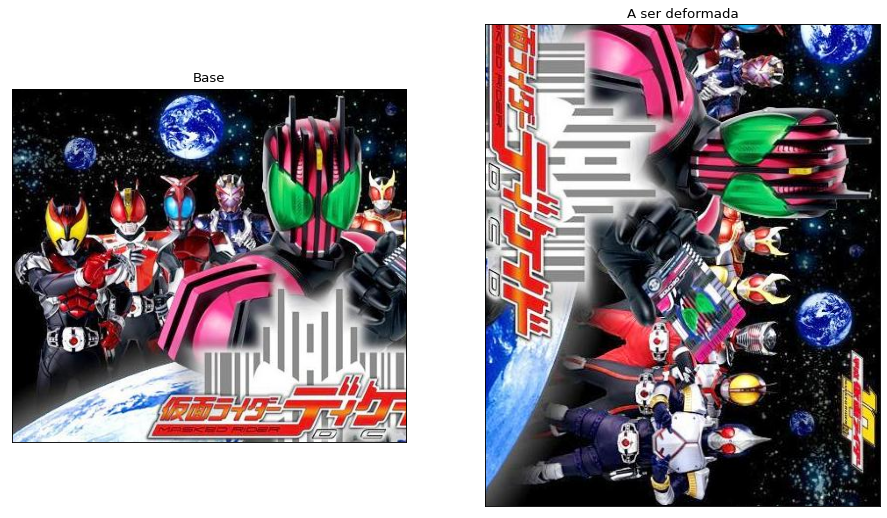

In [28]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(decade1, decade2)

<Figure size 800x800 with 0 Axes>

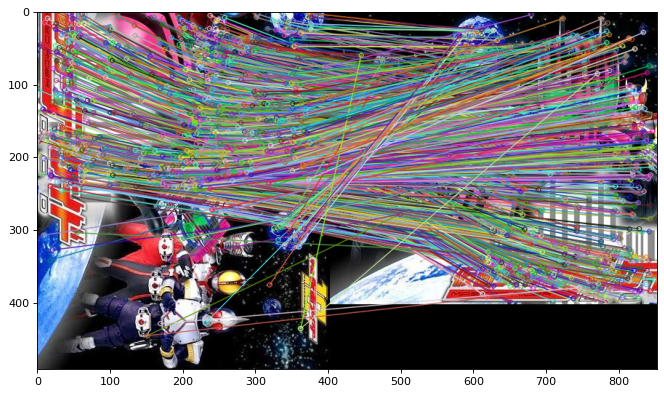

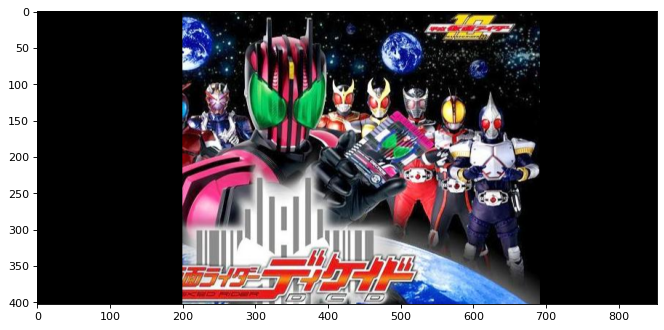

In [29]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match_decade, warp_decade = detect_match_warp(decade1, decade2)

### PANORAMA 03

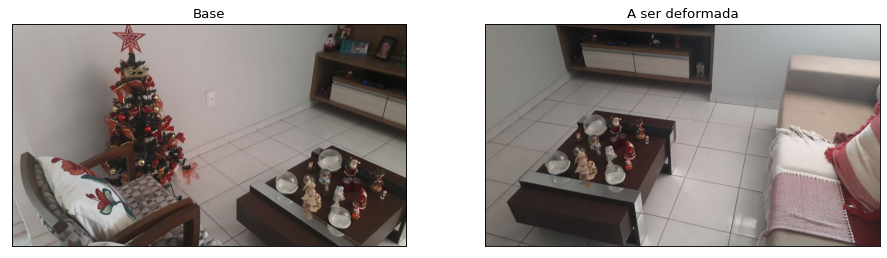

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left1, right1)

<Figure size 800x800 with 0 Axes>

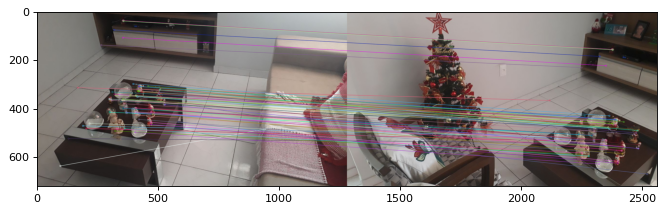

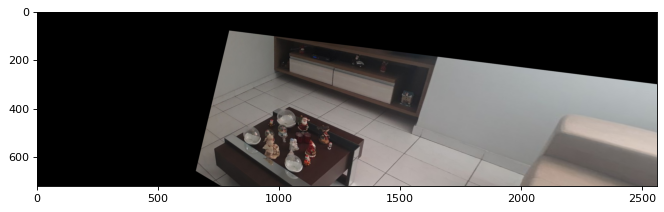

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(left1, right1, percent=0.5)

### PANORAMA 04

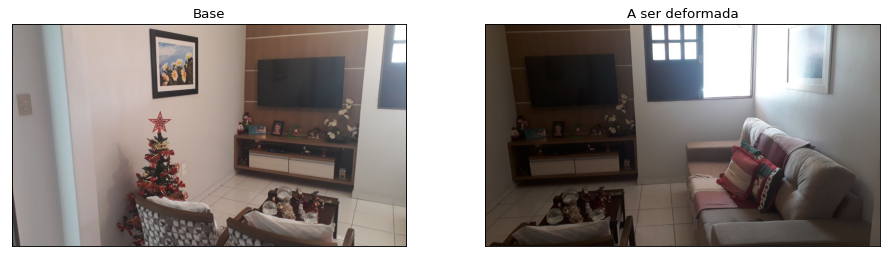

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left2, right2)

<Figure size 800x800 with 0 Axes>

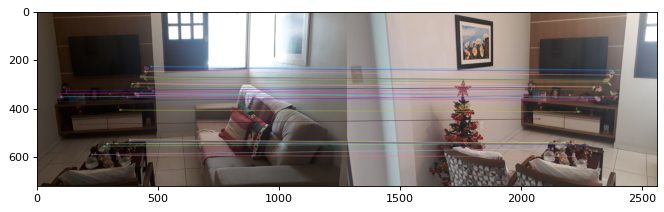

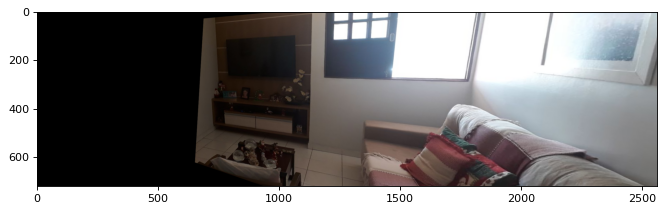

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(left2, right2, percent=0.4)

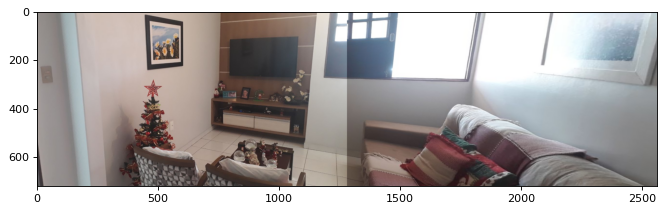

(<matplotlib.image.AxesImage at 0x7ff023fe4dd8>, None)

In [ ]:
for i in range(len(left2)):
  for j in range(len(left2[i])):
    #if (np.sum(warp02[i][j])==0): 
    warp02[i][j] = left2[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

### PANORAMA 05

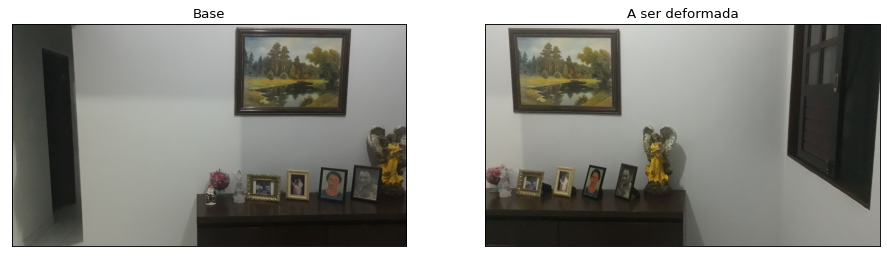

In [44]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question_imgs(left3, right3)

<Figure size 800x800 with 0 Axes>

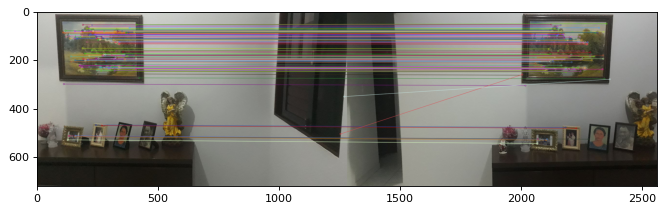

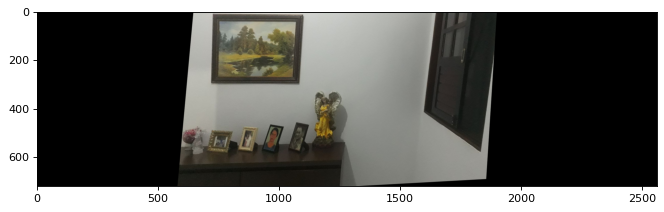

In [45]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match03, warp03 = detect_match_warp(left3, right3, percent=0.6)
#oinversa np.linalg.inv

# QUESTÃO 02

In [ ]:
p01 = cv.cvtColor(cv.imread('pan01-1.jpg'), cv.COLOR_BGR2RGB)
p02 = cv.cvtColor(cv.imread('pan01-2.jpg'), cv.COLOR_BGR2RGB)
p03 = cv.cvtColor(cv.imread('pan01-3.jpg'), cv.COLOR_BGR2RGB)

error: ignored

In [ ]:
#clean_zeros(warp01)

In [ ]:
def clean_zeros(img):
  for i in range(len(img)):
    print(np.sum(img[i]))


def plot_question2_imgs(img1, img2, img3):
  plt.subplot(131),plt.imshow(img1),plt.title('Esquerda')
  plt.xticks([]), plt.yticks([])

  plt.subplot(132),plt.imshow(img2),plt.title('Meio')
  plt.xticks([]), plt.yticks([])

  plt.subplot(133),plt.imshow(img3),plt.title('Direita')
  plt.xticks([]), plt.yticks([])

  plt.show()

### PANORAMA 01

In [ ]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plot_question2_imgs(p01, p02, p03)

NameError: ignored

<Figure size 1120x800 with 0 Axes>

#### Base: esquerda

<Figure size 800x800 with 0 Axes>

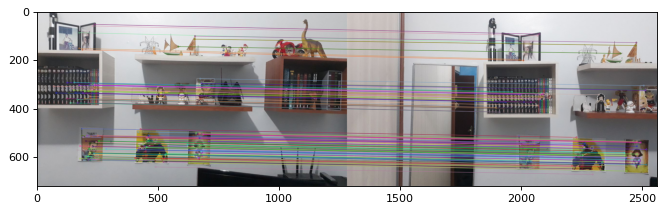

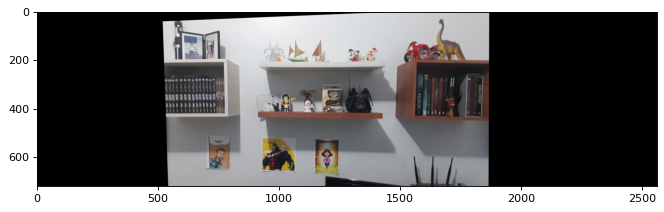

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p01, p02, percent=0.4)

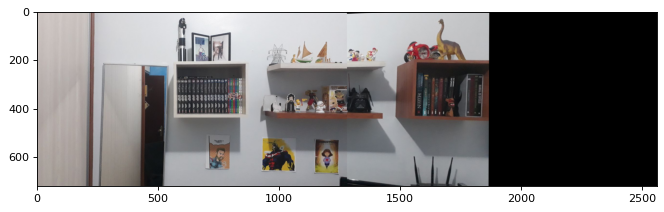

(<matplotlib.image.AxesImage at 0x7ff02435ec88>, None)

In [ ]:
for i in range(len(p01)):
  for j in range(len(p01[i])):
    warp01[i][j] = p01[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

<Figure size 800x800 with 0 Axes>

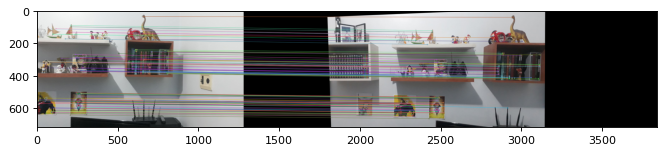

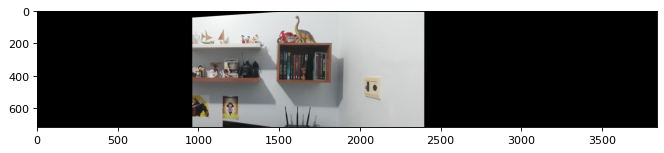

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(warp01, p03, percent=0.5)

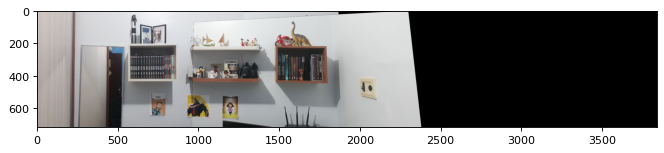

(<matplotlib.image.AxesImage at 0x7ff024176978>, None)

In [ ]:
for i in range(len(warp01)):
  for j in range(len(warp01[i])):
    if (np.sum(warp02[i][j]) == 0 and np.sum(warp01[i][j]) != 0): warp02[i][j] = warp01[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

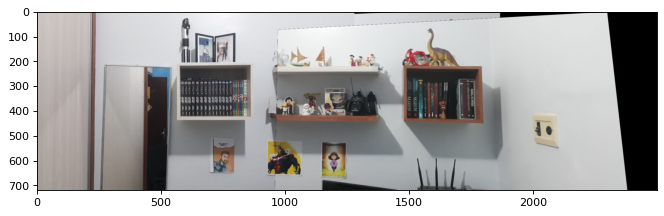

(<matplotlib.image.AxesImage at 0x7ff024154d68>, None)

In [ ]:
final = np.zeros((720, 2500, 3), np.uint8)
#warp02.shape
for i in range(len(final)):
  for j in range(len(final[i])):
    final[i][j] = warp02[i][j]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(final),plt.show()

#### Base: Meio

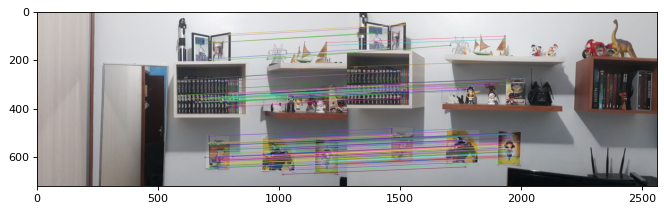

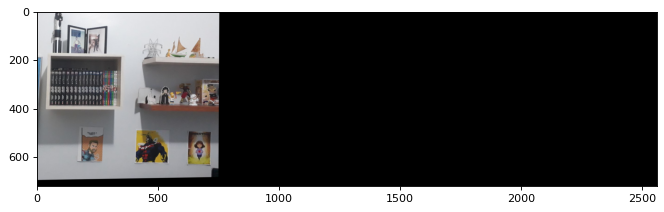

(<matplotlib.image.AxesImage at 0x7ff024493080>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p02, p01, percent=0.5)
plt.imshow(match01),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

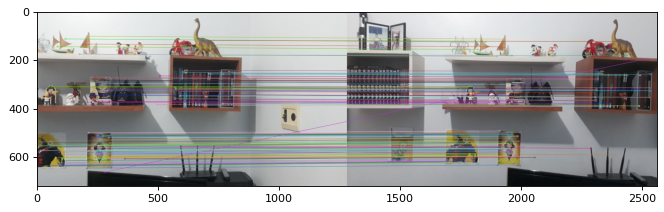

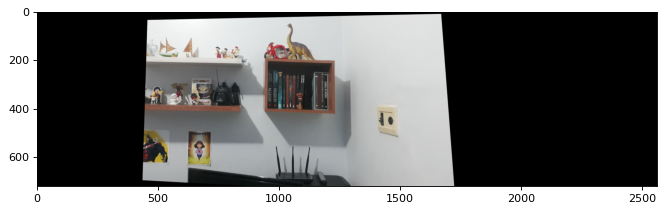

(<matplotlib.image.AxesImage at 0x7ff025df5518>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(p02, p03, percent=0.5)
plt.imshow(match02),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

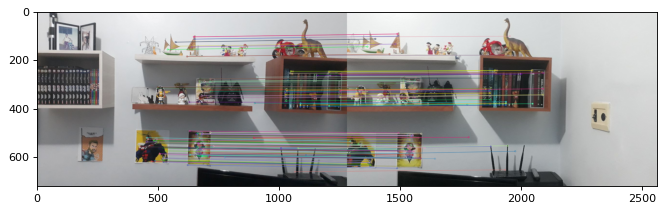

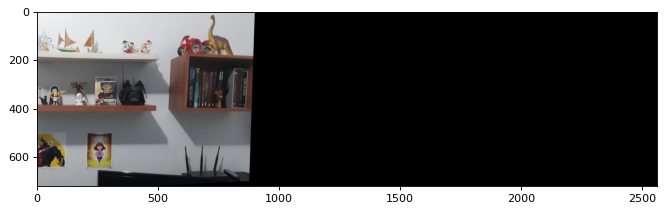

(<matplotlib.image.AxesImage at 0x7ff024298400>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(p03, p02, percent=0.5)
plt.imshow(match01),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

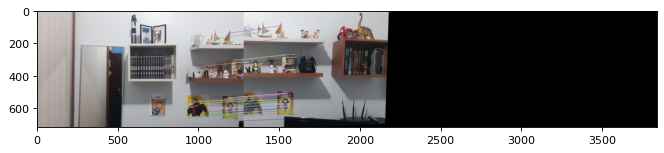

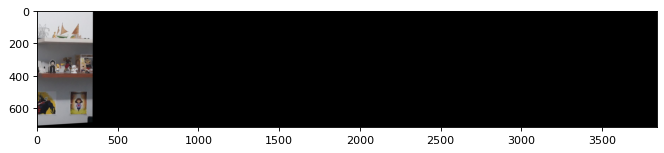

(<matplotlib.image.AxesImage at 0x7ff0240e36a0>, None)

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(warp01, p01, percent=0.5)
plt.imshow(match02),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

### PANORAMA 02

### PANORAMA 03

### PANORAMA 04

### PANORAMA 05

# QUESTÃO 03

Essa questão foi resolvida em um arquivo .py separado no repositorio, devido a facilidade em fazer a webcam rodar com os codigos em python do opencv fora do colab, aqui estão dispostos apenas os resultados gerados

<img src="q03 - print.jpg">

# QUESTÃO 04

O processo de calibração de câmera no opencv depende do cálculo de 2 matrizes: a de distorções e a da câmera. A matriz de distorções leva em conta dois tipos de ditorção, a radial e a tangencial, dependendo do tipo de câmera, a radial causa o efeito conhecido "como olho de peixe", já a tangencial, que ocorre devido aos planos da câmera e da imagem não estarem paralelos, seus cálculos podem nos retornar valores para a matriz de distorção [ k1 k2 p1 p2 k3 ]. A matriz da cãmera leva em conta os valores da distância focal em x e y, que geralmente podem ser assumidos iguais, e o centro ótico da camera, assim resultando na matriz [[fx 0 cx], [0, fy cy], [0, 0, 1]].

Para realizar os cálculos geométricos necessários, o opencv tem suporte a 3 métodos de calibração com objetos: tabuleiro de xadrez preto e branco, que busca os *corners* entre os limites de um quadrado preto e outro branco, padrões de círculos simétrico e padrões de círculo assimétricos, ambos que buscam calcular a partir dos centros dos círculos.

O algoritmo utilizado pela função calibrateCamera() se inspira em ideias propostas por Jean-Yves Bouguet e Zhengyou Zhang



https://docs.opencv.org/master/dc/d43/tutorial_camera_calibration_square_chess.html

https://docs.opencv.org/master/d4/d94/tutorial_camera_calibration.html

https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

https://www.learnopencv.com/camera-calibration-using-opencv/


--


http://www.vision.caltech.edu/bouguetj/calib_doc/


https://www.researchgate.net/publication/3193178_A_Flexible_New_Technique_for_Camera_Calibration